# Multiple Linear Regression

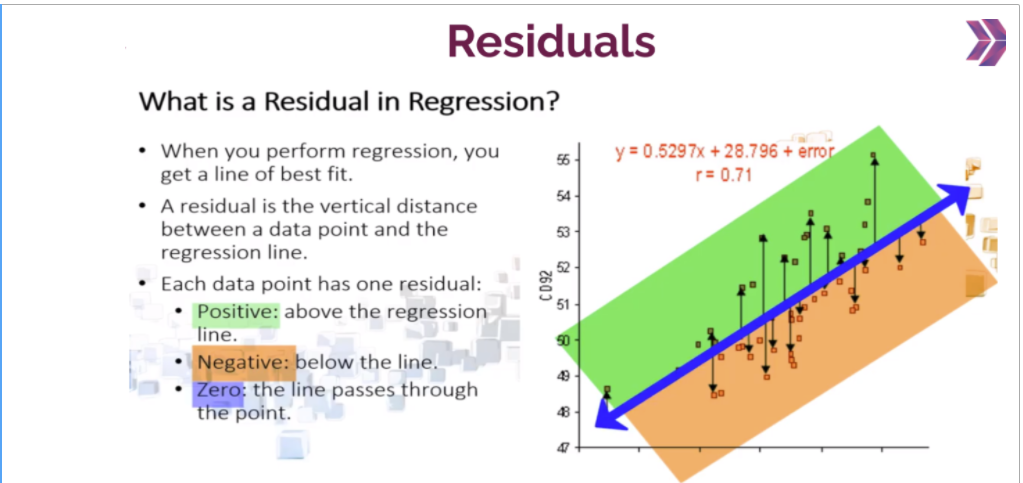

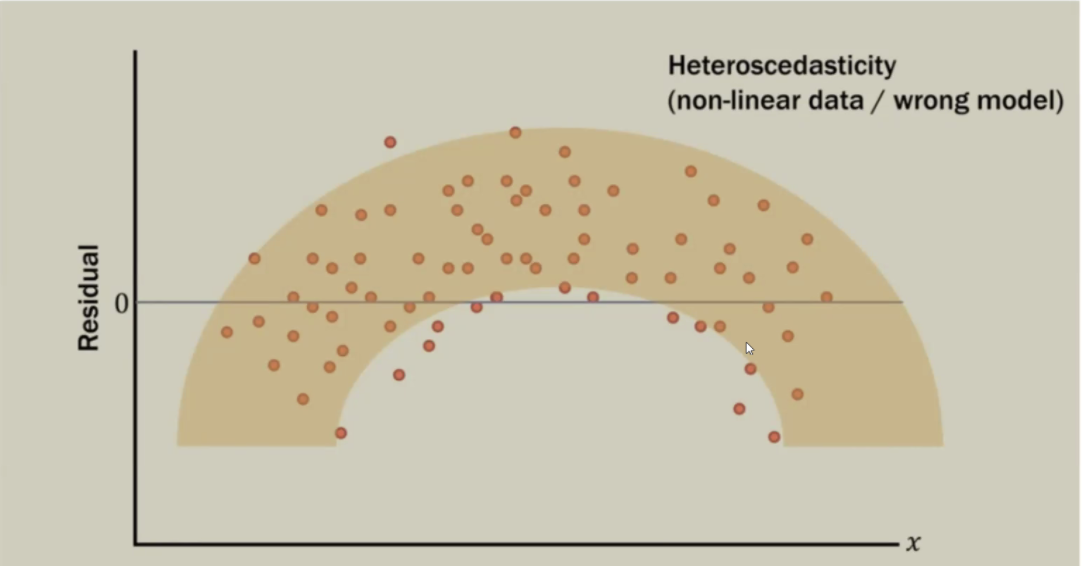

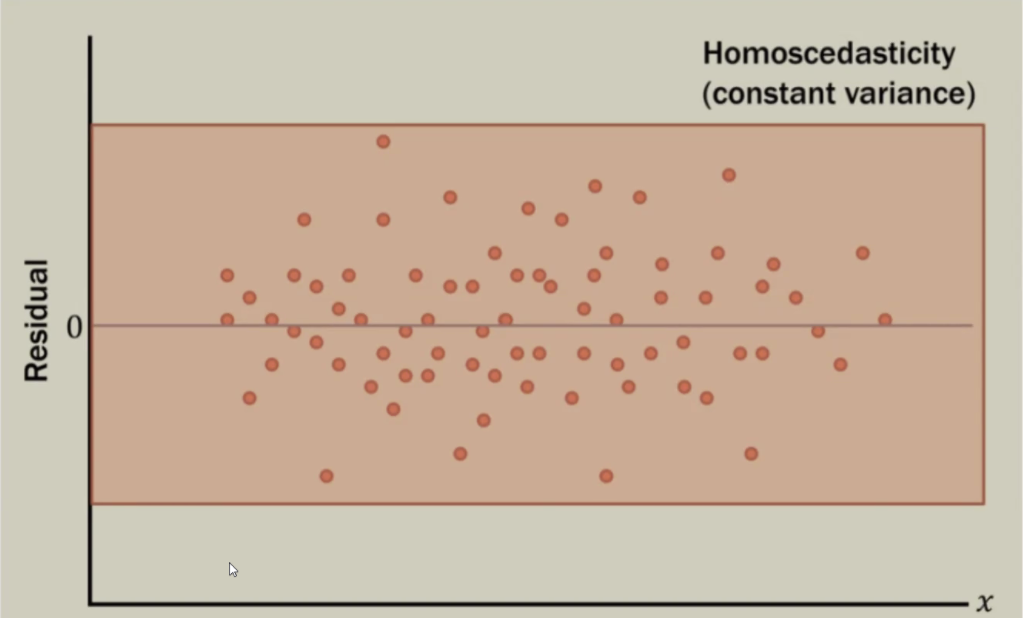

## Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Data Preparation

In [4]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [12]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df, kde=True)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

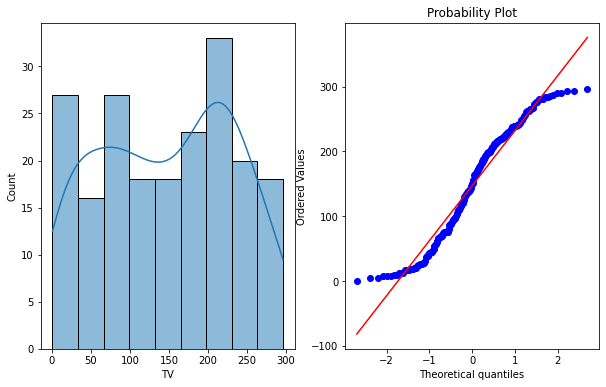

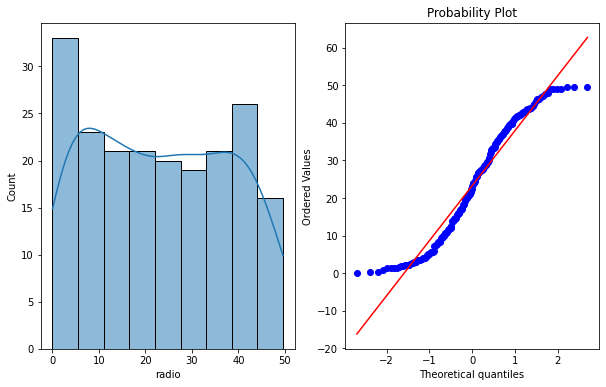

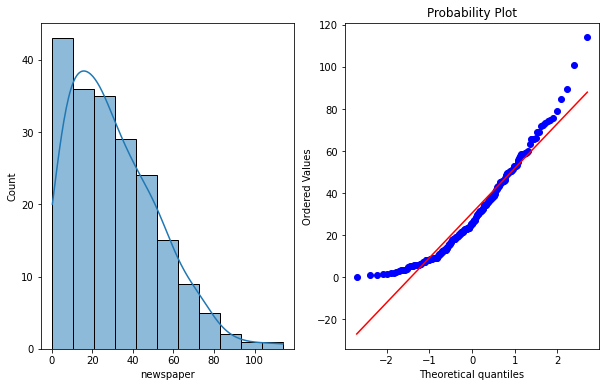

In [13]:
for col in df.drop("sales", axis=1).columns:
    check_dist(df, col)

If the features are close to normal distribution, ML model scores may be better.
If the blue line is like an ivy wrapping the red line it can be said there is normal distribution.
But, if there is divergence at ends we can't talk about normal distribution.

In [15]:
# pip install scikit-learn

from scipy.stats import skew

In [16]:
for i in df.drop(columns = "sales").columns:
    print(i, skew(df[i]))

TV -0.06932836662244649
radio 0.0934668451108453
newspaper 0.8879959753085498


Acceptable range of skewness score for linear regression is between -1 ile +1.
If skewness score is between -0.5 ile +0.5 there is normal distribution which is appropriate for linear regression.
skewness score between -+0.5 ile -+1 show moderate skewness which is alse appropriate for linear regression.
If it is larger than -+1 linear regression model score may be bad but we have to create model anyway and see the results.

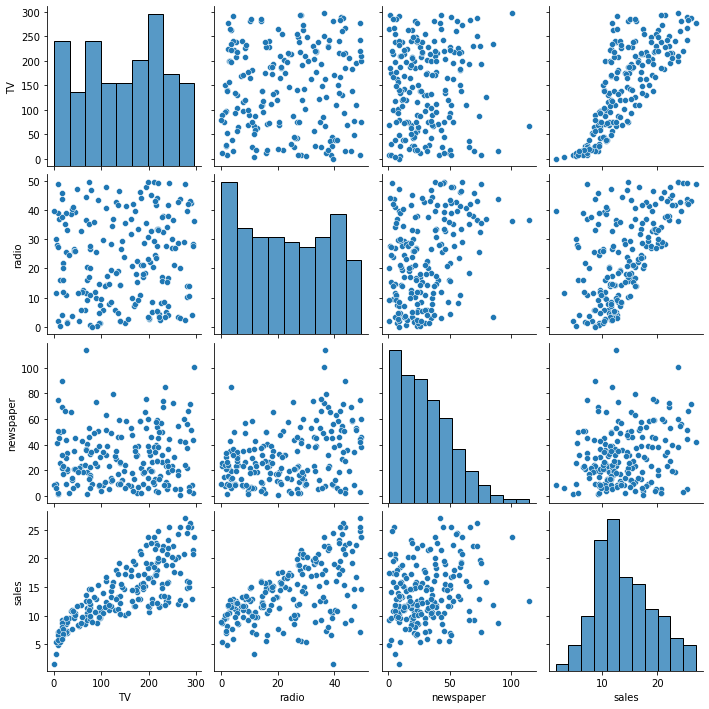

In [17]:
sns.pairplot(df)

<AxesSubplot:>

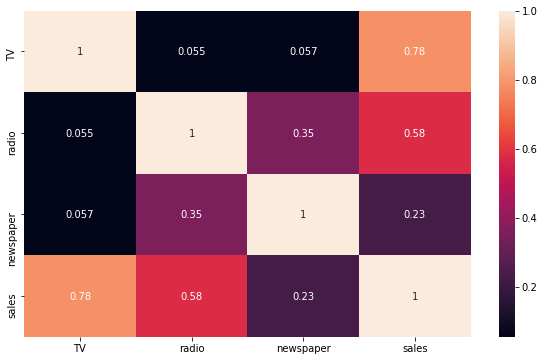

In [19]:
sns.heatmap(df.corr(), annot = True)

## Train-Test Split

In [20]:
# pip install scikit-learn

In [21]:
X = df.drop(columns = "sales")  # df.[["TV", "radio", "newspaper"]]

y = df["sales"]

In [22]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# test_size = 0.3 ile datamın yüzde 30'unun test verisi olarak ayırdım.

# elimizdeki data az sayıda ise test_size 0.5'e kadar çıkarılabilir.

In [28]:
df.sample(15)

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
43,206.9,8.4,26.4,12.9
126,7.8,38.9,50.6,6.6
3,151.5,41.3,58.5,18.5
99,135.2,41.7,45.9,17.2
16,67.8,36.6,114.0,12.5
174,222.4,3.4,13.1,11.5
104,238.2,34.3,5.3,20.7
193,166.8,42.0,3.6,19.6
175,276.9,48.9,41.8,27.0


In [29]:
print("Train features shape :", X_train.shape)
print("Train features shape :", y_train.shape)
print("Train features shape :", X_test.shape)
print("Train features shape :", y_test.shape)

Train features shape : (140, 3)
Train features shape : (140,)
Train features shape : (60, 3)
Train features shape : (60,)


In [30]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [31]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

## Model Fitting and Compare Actual and Predicted Labels

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [34]:
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [36]:
my_dict = {"Actual" : y_test, "pred" : y_pred, "residual" : y_test - y_pred}

In [37]:
comparing = pd.DataFrame(my_dict)
comparing.head(10)

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


In [38]:
result_sample = comparing.head(25)

result_sample

,Actual,pred,residual
95,16.9,16.565396,0.334604
15,22.4,21.188228,1.211772
30,21.4,21.551071,-0.151071
158,7.3,10.889238,-3.589238
128,24.7,22.202320,2.497680
115,12.6,13.355569,-0.755569
69,22.3,21.196925,1.103075
170,8.4,7.350285,1.049715
174,11.5,13.275471,-1.775471
45,14.9,15.124495,-0.224495


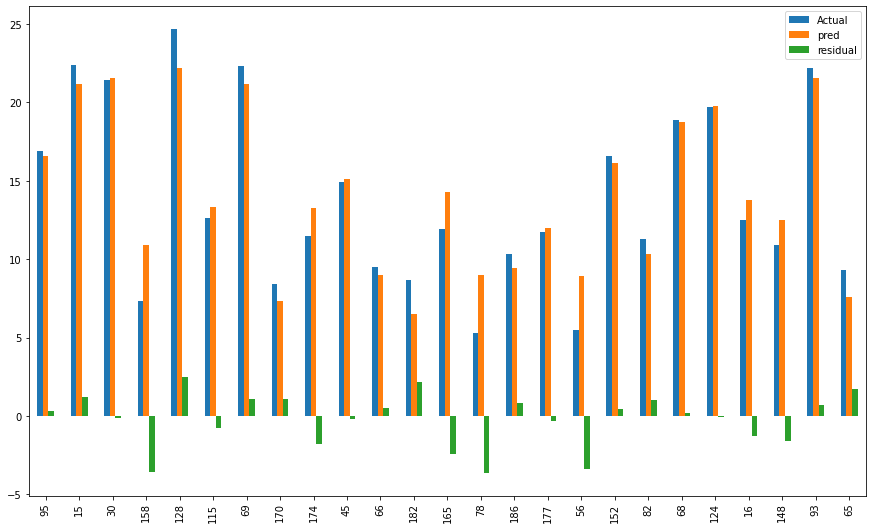

In [39]:
result_sample.plot(kind = "bar", figsize = (15, 9))
plt.show()

## Error Metrics

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
R2_score = r2_score(y_test, y_pred)

R2_score

0.8609466508230368

In [42]:
mae = mean_absolute_error(y_test, y_pred)

mae

1.5116692224549084

In [43]:
mse = mean_squared_error(y_test, y_pred)

mse

3.7967972367152183

In [44]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

1.9485372043446383

In [45]:
sales_mean = df["sales"].mean()

sales_mean

14.022500000000003

In [46]:
mae / sales_mean

# sales ortalamam 14 idi, mae ortalamam 1.5 idi. 
# 1.5'u 14'e bölersem 1.5'un 14'ün yüzde kaçı olduğunu bulmuş olurum.

0.10780311802138763

In [50]:
rmse / sales_mean

0.13895790367941796

## What is the concept of punishment for RMSE error metric?

In [59]:
variables = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3200]}

variables2 = {"Actual": [1000, 2000, 3000], "pred": [1100, 2200, 3600]} # RMSE'nin hataları nasıl cezalandırdığını görmek için pred'in son değerini 3600 yaptım.

In [53]:
df_2 = pd.DataFrame(variables)
df_2

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3200


In [60]:
df_3 = pd.DataFrame(variables2)
df_3

,Actual,pred
0,1000,1100
1,2000,2200
2,3000,3600


In [62]:
df_2["residual"] = abs(df_2.Actual - df_2.pred)
                       
df_2

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3200,200


In [63]:
df_3["residual"] = abs(df_3.Actual - df_3.pred)
                       
df_3

,Actual,pred,residual
0,1000,1100,100
1,2000,2200,200
2,3000,3600,600


In [57]:
# mae

df_2.residual.sum() / 3 # 166.66

166.66666666666666

In [64]:
df_3.residual.sum() / 3 

# pred'in bir değerini 3600 yaptığımda mae 166.66 dan 300 e çıktı!

300.0

In [58]:
# rmse 

((df_2.residual ** 2).sum() / 3) ** 0.5

173.20508075688772

In [65]:
((df_3.residual ** 2).sum() / 3) ** 0.5

369.68455021364724

## Evaluation Model

In [66]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [67]:
eval_metric(y_test, y_pred)

# modelimi test ettiğim test datamın eval metrik değelerini çıkarttım.

Model testing performance:
--------------------------
R2_score 	: 0.8609466508230368
MAE 		: 1.5116692224549084
MSE 		: 3.7967972367152187
RMSE 		: 1.9485372043446383


In [69]:
y_train_pred = model.predict(X_train)

In [70]:
eval_metric(y_train, y_train_pred)

# modelimi eğittiğim train datamın eval metrik değelerini çıkarttım. 
# Test datamın eval metrik değerleri ile bunu kıyaslayacağım.

Model testing performance:
--------------------------
R2_score 	: 0.9055159502227753
MAE 		: 1.1581502948072524
MSE 		: 2.4793551789057866
RMSE 		: 1.574596830590544


## Is data suitable for linear regression?

## Plotting residuals

In [71]:
residuals = y_test - y_pred

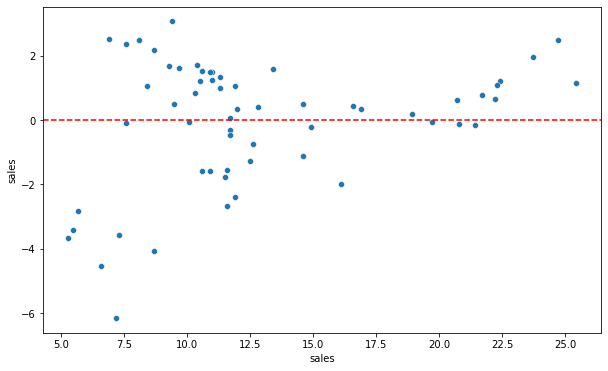

In [72]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

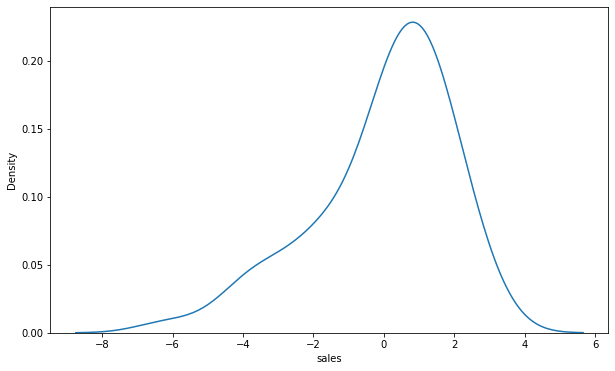

In [75]:
sns.kdeplot(residuals)

# left skewed olduğu görülüyor.

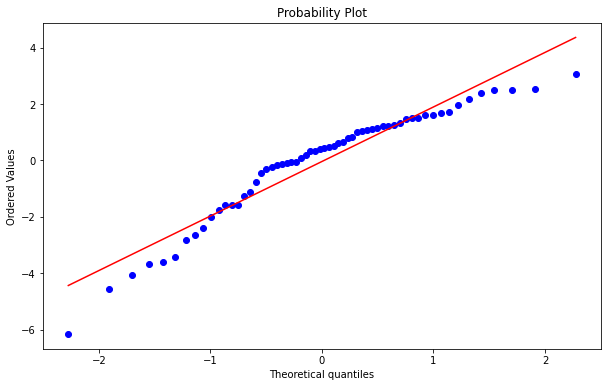

In [74]:
stats.probplot(residuals, dist="norm", plot=plt);

# verilerim kırmızı çizginin etrafında sarmaşık gibi dolanıyorsa normal dağılıma yakın demektir.

In [81]:
skew(residuals)

-0.9865673346742709

In [ ]:
# pip install yellowbrick

# !pip install yellowbrick

In [49]:
from yellowbrick.regressor import ResidualsPlot

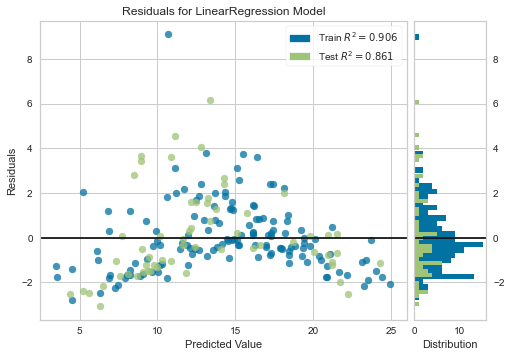

In [50]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

## Prediction Error for LinearRegression

In [ ]:
from yellowbrick.regressor import PredictionError

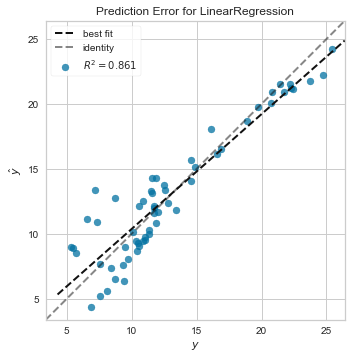

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [85]:
# Instantiate the linear model and visualizer
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Retraining Model on Full Data

In [51]:
final_model = LinearRegression()

In [52]:
final_model.fit(X, y)

LinearRegression()

## Coefficients

In [53]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [54]:
final_model.intercept_

2.9388893694594085

In [55]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [57]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"])

In [58]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


## Prediction on New Data

In [60]:
adv = [[150, 20, 15]]
adv

[[150, 20, 15]]

In [61]:
final_model.predict(adv)

array([13.55862413])

In [62]:
0.045765 *150 + 0.188530 *20 + -0.001037*15 + 2.9388893694594085

13.558684369459407

In [63]:
adv_2 = [[150, 20, 15], [160, 20, 15]]

In [64]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

## Feature importance (The effect of features on the predicted label)

In [65]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [66]:
np.array(adv).reshape(3,1)

array([[150],
       [ 20],
       [ 15]])

In [67]:
coeff_df * np.array(adv).reshape(3,1)

,Coefficient
TV,6.864697
radio,3.770600
newspaper,-0.015562


In [68]:
6.864697 / 13.55862413

0.5062974630892729

In [69]:
3.770600 / 13.55862413

0.2780960637191142